[![Le Baladin](https://img.shields.io/badge/Le_baladin-Nova_2021_CAS_/_v1405_Cas-blue.svg)](https://sites.google.com/view/astronomie-ut1/accueil)

_Dominique Touzan_<sup>1,2</sup>

<sup>1</sup>Notebook: https://github.com/dtouzan/Jupyter/blob/master/Nova_2021_CAS.ipynb

<sup>2</sup>Correspondance: [dtouzan@gmail.com](mailto:dtouzan@gmail.com).

Édition   1.0, révision 01/12/2021 - 01/02/2022.

---
**Résumé** : Début automne les observations ont commencé avec le SA200. L'utilisation de celui ci est facile à mettre en oeuvre et donne des résultat pour le moment me satisfaisant. Les nuit durant lesquelles les images ont été prise pour les premiers spectres n'étaient pas exempt de lune , nuage et brume de plus pour certaines prises le filtre 'L' du porte filtre n'a pas été enlevé (ça coupe bien la lumière). Donc seulement deux soirées ont été retenues pour les données celles du 22 novembre et du 23 novembre 2021. Les instruments ont bien fonctionné tout de même et le suivi de l'étoile variable **v1405 Cas** me fourni une descente de magnitude 7 à 9. Un petit module python a été créé pour utiliser le module **Specutils** et afficher facilement les spectres obtenus.

**Observations** : Le montage optique effectué est assez simple à construire, un objectif photographique de 60 mm de diamètre et d'une focale de 85 mm celui ci est ouvert à F/D 6 au lieu de F/D 1.4 ce qui réduit malheureusement considérablement la luminosité mais améliore l'image. Le porte filtre EFWmini qui n'est pas utilisé dans la configuration spectrographe mais seulement prise d'image grand champ. La caméra ASI 178MM et le SA200 installé un peu avant la CMOS environ à 12 mm de celle ci. Les images ont été prise en binning 1 et avec un temps de pose de 120 secondes. Un empilement médian est effectué pour avoir une image relativement correcte et pas trop bruité, une rotation de 9° sur l'image finale est nécéssaire pour remettre les spectres à l'horizontal (la rotation du SA200 n'est pas facilement controlable).


_Mots-clés_ : `SA200` - `Spectre` - `Optique` - `specutils` - `Variable` - `Nova`

---
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/) [![specutils](http://img.shields.io/badge/powered%20by-Specutils-orange.svg?style=flat)](https://specutils.readthedocs.io/en/stable/#) [![astroquery](http://img.shields.io/badge/powered%20by-Astroquery-orange.svg?style=flat)](http://www.astropy.org/astroquery/) [![cds](http://img.shields.io/badge/CDS-Database-green.svg?style=flat)](http://cdsportal.u-strasbg.fr/) [![aavso](http://img.shields.io/badge/AAVSO-Database-green.svg?style=flat)](https://www.aavso.org/databases)


- Importation des modules matplotlib, sa200, archive, aavso et ciboulette

In [1]:
import warnings
from matplotlib import pyplot as plt
from ciboulette.aavso.webobs import WebObs, datadownload, vsx
from ciboulette.utils.archive import Archive
from ciboulette.spectrum import sa200
import ciboulette.base.ciboulette as Cbl
import ciboulette.base.constant as C
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

>**Note:** Les `warnings` sont des défauts de lecture de l'entête FITS concernant le champs `DATE-OBS`

- Création de la courbe avec la page data-download (https://www.aavso.org/data-download) et copie du fichier dans le répertoire. Adapter le nom du fichier de '.txt' en '.csv'. Création de la courbe, des données VSX et des archives en sélectionnant que le nom "v1405cas" (le répertoire local est datatset/archives). 

In [2]:
cbl = Cbl.Ciboulette()
c = datadownload(filtername='V',fileinput='aavsodata.csv')
v = vsx('v1405 cas')
a = Archive(archive_table = 'dataset/archives')
a.select='v1405cas'
a.read

- Editer quelques information sur les données AAVSO 

In [3]:
v.observations.pprint_all()

   Name       AUID      RA2000  Declination2000 VariabilityType   Period     Epoch     MaxMag MinMag       Discoverer      Category   OID   Constellation
--------- ----------- --------- --------------- --------------- --------- ------------ ------ ------ --------------------- -------- ------- -------------
V1405 Cas 000-BNX-642 351.19887        61.18744             NB: 0.1883907 2458859.0688  5.2 V 15.6 V Zbyn&amp;#283;k Henzl Variable 2216132           Cas


In [4]:
c.comments,

('Showing 50713 observations for N Cas 2021 from 252 observers',)

- Editer la courbe avec le filtre V et ajouter le JD des archives.

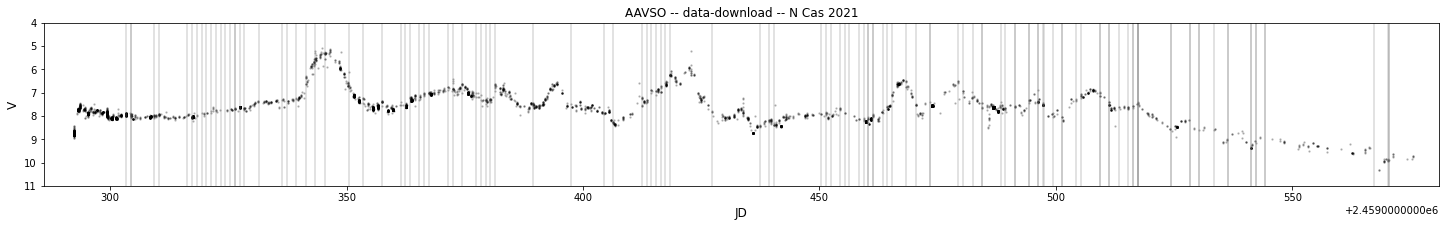

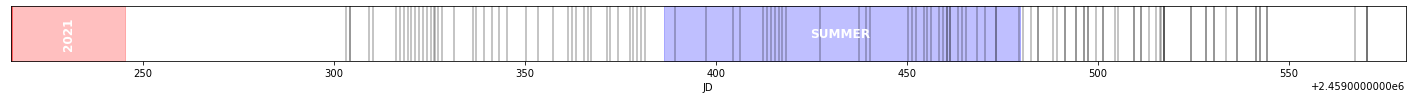

Magnitude: (5.082, 10.336) Julyan Day: (2459290.65, 2459575.87847) Period: 285.22846999997273


In [3]:
plt.figure(figsize=(25,3))
c.V
c.JulianDay = a.observations()['JD']
c.plot()
plt.show()

plt.figure(figsize=(25,1))
a.start = 2021
a.stop = 2022
a.plot()

print('Magnitude:',c.magnitudeMinMax,'Julyan Day:',c.JDMinMax,'Period:',c.period)

>**_Note_ :** Les fichiers fits des images sont [ici](https://drive.google.com/drive/folders/1rvOLhaCoAs7-KvF8A8l54DUlIH7qFNtc?usp=sharing).

- Configuration de Ciboulette avec les coordonées AAVSO, du Canon 200mm F2.8 comme optique et de la caméra ZWO ASI178MM. Projection de l'emplacement de Messier 52 et carte de la région. La position de la lune est à la date du jour de la création du document.

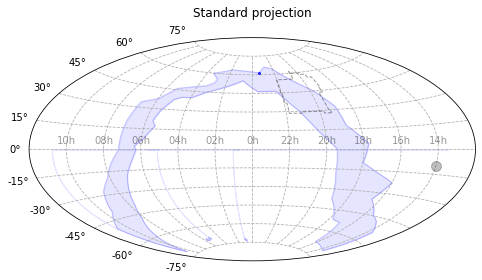

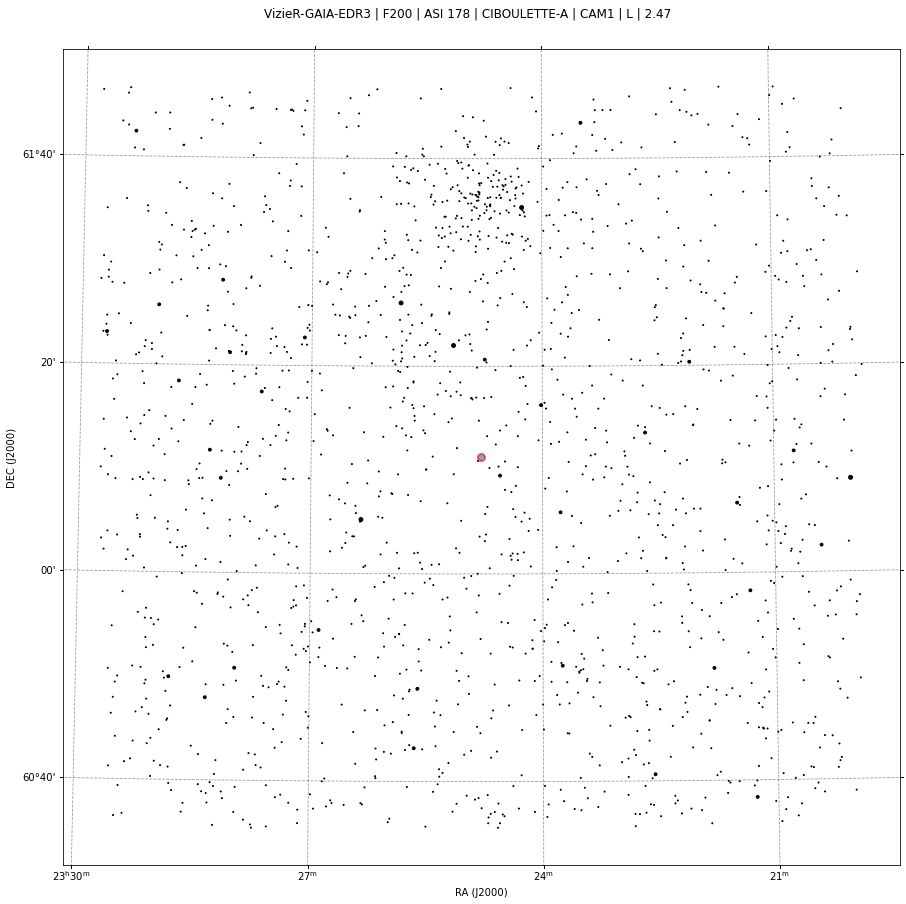

In [4]:
cbl.positionsbyaavso = 'v1405 cas'
cbl.canon200_2_8
cbl.asi178
cbl.projections
cbl.starsmap

>**_Note_ :** Pour la configuration du module ciboulette c'est [ici](https://github.com/dtouzan/ciboulette/blob/main/notebook/exemple-base.ipynb).

- Lecture des profiles créés et des références ISIS 6.1.1 et création de la bibliothèque

In [27]:
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)
dataset = ('dataset/dbspectre/Pn_v1405cas-20211122.fits',
           'dataset/dbspectre/Pn_v1405cas-20211123.fits',
           'dataset/dbspectre/Pn_v1405cas-20211221.fits')

table_sa200 = []
for file in dataset:
    table_sa200.append(sa200.SA200(file))

B2IV_P = sa200.SA200('dataset/dbspectre/ref-B2IV-3500-8000.fits')
B2IV = sa200.SA200('dataset/dbspectre/ref-B2IV.fits')

>**Note:** Les fichiers sont [ici.](https://drive.google.com/drive/folders/1vB4VsLEAP8Jh2qYspy3vRUTOjJ1kNKfP?usp=sharing)

- Comparaison des spectres de **v1405 Cas**. 

Sans le traitement de la PLU l'image est bien bruitée, de plus avec ce mode pleine ouverture les étoiles sont dans les spectres. Cela n'empèche pas de faire plusieurs spectres basse résolution même en tournant le SA200 ou d'avoir deux ou trois réseaux ayant plusieurs oriantation dans un porte filtre et de faire une médianne des images(applications non fait pour ce cas).

Expliquer pourquoi B2IV...

In [28]:
#Serie de balmer
Ha = 6562.10
Hb = 4861.32
Hg = 4340.46
Hd = 4101.73

Mg = 5714

# Doublet du sodium
NaID1 = 5889.950
NaID2 = 5895.924 

SiIIa = 6347.1
SiIIb = 6371.4

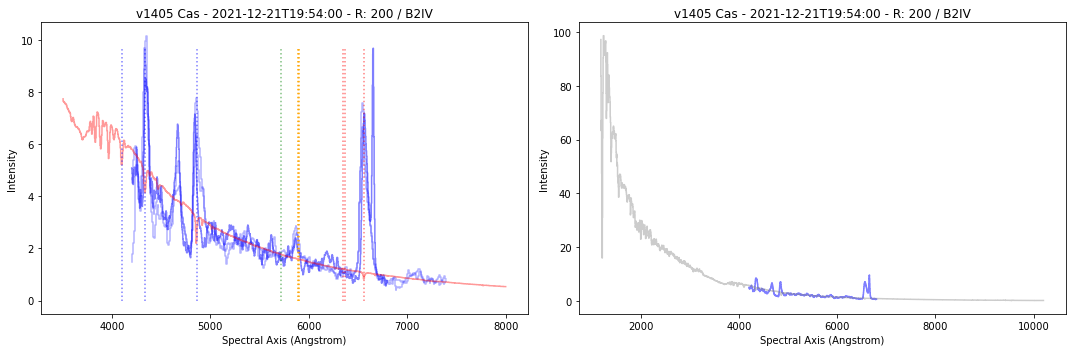

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  
_alpha = 0.3
_color = 'blue'
for S in table_sa200:
    if S == table_sa200[2]:
        _alpha = 0.5
        _color = 'blue'
    axs[0].set_title(S.title)
    axs[0].step(S.s1d.spectral_axis, S.s1d.flux, color = _color, alpha = _alpha)
axs[0].step(B2IV_P.s1d.spectral_axis, B2IV_P.s1d.flux, color = 'red', alpha = 0.4)
axs[0].vlines(Ha, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
axs[0].vlines(Hb, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
axs[0].vlines(Hg, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
axs[0].vlines(Hd, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
axs[0].vlines(Mg, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'green', alpha = 0.5)
axs[0].vlines(NaID1, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'orange', alpha = 1)
axs[0].vlines(NaID2, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'orange', alpha = 1)
axs[0].vlines(SiIIa, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
axs[0].vlines(SiIIb, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
axs[0].set_title(table_sa200[2].title)  
axs[0].set_xlabel('Spectral Axis ({})'.format(table_sa200[1].s1d.spectral_axis.unit)) 
axs[0].set_ylabel('Intensity'.format(table_sa200[1].s1d.flux.unit))

axs[1].set_title(table_sa200[2].title)
axs[1].step(S.s1d.spectral_axis, S.s1d.flux, color = 'blue', alpha = 0.5)
axs[1].step(B2IV.s1d.spectral_axis, B2IV.s1d.flux, color = 'grey', alpha = 0.4)
axs[1].set_xlabel('Spectral Axis ({})'.format(table_sa200[1].s1d.spectral_axis.unit)) 
axs[1].set_ylabel('Intensity'.format(table_sa200[1].s1d.flux.unit))

fig.tight_layout()
plt.show()

>**_Fig 6.0._** Certaines raies ne sont que des étoiles à l'ordre 0. A la fin du spectre la raie après H alpha est l'étoile TYC 4280-759-1.

## Instruments et applications
---
La partie spectrographe est faite par l'instrument de droite. Vers septembre 2021 les images ont été réalisées par la CCD Atik 383L+ et le télescope Intes M603 le suivi était assuré par la caméra ZWO ASI 120Mini et l'Atik OAG. Début descembre l'objectif Samyang 85 mm F1.4 a été remplacé par un objectif Canon 200 mm F2.8. A voir

![preview](https://github.com/dtouzan/preview/blob/main/spectro.png?raw=true)


## Remerciements
---
Remerciements aux auteurs des documentations des logiciels et des sites internet pour faciliter l'utilisations de ceux-ci, ainsi qu'aux nombreuses bases de données publique CDS portal et AAVSO.

## Références
---
<a id='ref1'></a>
[1]. Isis 6.1, http://www.astrosurf.com/buil/isis-software.html<br>
<a id='ref2'></a>
[2]. Siril 1.0.0-rc2, https://siril.org/fr/<br>
<a id='ref3'></a>
[3]. Aladin Sky Atlas 11.0, https://aladin.u-strasbg.fr/<br>
<a id='ref4'></a>
[4]. RSpec 2.0, https://www.rspec-astro.com/<br>
<a id='ref5'></a>
[5]. AAVSO, https://www.aavso.org/databases<br>
<a id='ref6'></a>
[6]. CDS Portal, http://cdsportal.u-strasbg.fr/<br>
<a id='ref7'></a>
[7]. Dataset, https://drive.google.com/drive/folders/1vB4VsLEAP8Jh2qYspy3vRUTOjJ1kNKfP?usp=sharing

![preview](https://github.com/dtouzan/preview/blob/main/logo.png?raw=true)